# Advanced Analytics and Filtering Demo

This notebook demonstrates the advanced analytics and filtering capabilities of pyEuropePMC, including:

1. Result analysis tools (publication year distribution, citation patterns)
2. Pandas DataFrame conversion
3. Duplicate detection and removal
4. Quality metrics
5. Author statistics and collaboration patterns
6. Visualization and trend analysis charts

In [22]:
# Force reload the module
import sys
if 'pyeuropepmc.analytics' in sys.modules:
    del sys.modules['pyeuropepmc.analytics']
if 'pyeuropepmc' in sys.modules:
    del sys.modules['pyeuropepmc']

# Re-import with caching support
from pyeuropepmc import (
    SearchClient,
    to_dataframe,
    publication_year_distribution,
    citation_statistics,
    detect_duplicates,
    remove_duplicates,
    quality_metrics,
    publication_type_distribution,
    journal_distribution,
    author_statistics,
    plot_publication_years,
    plot_citation_distribution,
    plot_quality_metrics,
    plot_publication_types,
    plot_journals,
    plot_trend_analysis,
    create_summary_dashboard,
)
from pyeuropepmc.cache import CacheConfig
import matplotlib.pyplot as plt

## 1. Search for Papers

Let's start by searching for papers on a specific topic.

In [23]:
# Initialize the search client with caching enabled
cache_config = CacheConfig(enabled=True, ttl=3600*24)  # 24 hour cache
client = SearchClient(cache_config=cache_config)

# Search for papers on ME/CFS - get more results using pagination
query = "ME/CFS"
print(f"Searching for '{query}' with caching enabled...")

# First, get the total hit count
hit_count = client.get_hit_count(query, resultType="core")
print(f"Total results available: {hit_count:,}")

# Fetch up to 500 results (or all if less than 500)
max_results = min(500, hit_count)
print(f"Fetching {max_results} results...")

# Use search_all to get all results with automatic pagination
papers = client.search_all(query, max_results=max_results, resultType="core")
print(f"Successfully retrieved {len(papers)} papers on '{query}'")

Cache get error for key search:ceac5fa849725e27: no such column: "misses" - should this be a string literal in single-quotes?


Searching for 'ME/CFS' with caching enabled...


Cache set error for key search:ceac5fa849725e27: no such column: "size" - should this be a string literal in single-quotes?
Cache get error for key search:66e10f69706ff39d: no such column: "misses" - should this be a string literal in single-quotes?
Cache get error for key search:66e10f69706ff39d: no such column: "misses" - should this be a string literal in single-quotes?


Total results available: 6,309
Fetching 500 results...


Cache set error for key search:66e10f69706ff39d: no such column: "size" - should this be a string literal in single-quotes?
Cache get error for key search:3c84926088814464: no such column: "misses" - should this be a string literal in single-quotes?
Cache get error for key search:3c84926088814464: no such column: "misses" - should this be a string literal in single-quotes?
Cache set error for key search:3c84926088814464: no such column: "size" - should this be a string literal in single-quotes?
Cache get error for key search:9b79825d3fa73d08: no such column: "misses" - should this be a string literal in single-quotes?
Cache set error for key search:3c84926088814464: no such column: "size" - should this be a string literal in single-quotes?
Cache get error for key search:9b79825d3fa73d08: no such column: "misses" - should this be a string literal in single-quotes?
Cache set error for key search:9b79825d3fa73d08: no such column: "size" - should this be a string literal in single-quotes?


Successfully retrieved 500 papers on 'ME/CFS'


## 2. Convert to Pandas DataFrame

Convert the search results to a pandas DataFrame for easier manipulation and analysis.

In [24]:
# Convert to DataFrame
df = to_dataframe(papers)

# Display basic information
print(f"DataFrame shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

DataFrame shape: (500, 27)

Columns: ['id', 'source', 'title', 'authorString', 'journalTitle', 'pubYear', 'pubType', 'isOpenAccess', 'citedByCount', 'doi', 'pmid', 'pmcid', 'abstractText', 'hasAbstract', 'hasPDF', 'inPMC', 'inEPMC', 'language', 'pageInfo', 'affiliation', 'meshTerms', 'grants', 'publisher', 'firstPublicationDate', 'hasReferences', 'hasTextMinedTerms', 'hasDbCrossReferences']

First few rows:


,id,source,title,authorString,journalTitle,pubYear,pubType,isOpenAccess,citedByCount,doi,...,language,pageInfo,affiliation,meshTerms,grants,publisher,firstPublicationDate,hasReferences,hasTextMinedTerms,hasDbCrossReferences
0,PPR1098149,PPR,Analysis of Potential Subgroups in Vaes ME/CFS...,Squires E.,,2025,Preprint,N,0,10.20944/preprints202509.1179.v4,...,,,,,,Preprints.org,2025-09-30,False,True,False
1,PPR1081550,PPR,Barrier Repair in ME/CFS: Lessons from Prototy...,Squires E.,,2025,Preprint,N,0,10.20944/preprints202509.0576.v2,...,,,,,,Preprints.org,2025-09-08,False,True,False
2,40944028,MED,Autonomic Dysfunction in Myalgic Encephalomyel...,"Issa A, Lin JS, Chen Y, Attell J, Brimmer D, B...",Journal of clinical medicine,2025,research-article; Journal Article,Y,0,10.3390/jcm14176269,...,eng,6269,Division of High-Consequence Pathogens and Pat...,,,,2025-09-05,True,True,False
3,PPR1085173,PPR,Analysis of ME/CFS Patient Clusters in Vaes Da...,Squires E.,,2025,Preprint,N,0,10.20944/preprints202509.1179.v1,...,,,,,,Preprints.org,2025-09-15,False,True,False
4,40627388,MED,Patient-reported treatment outcomes in ME/CFS ...,"Eckey M, Li P, Morrison B, Bergquist J, Davis ...",Proceedings of the National Academy of Science...,2025,research-article; Journal Article,Y,2,10.1073/pnas.2426874122,...,eng,e2426874122,Computational Research Center for Complex Chro...,"Humans; Fatigue Syndrome, Chronic*; Treatment ...",Open Medicine Foundation (OMF),,2025-07-08,True,True,False


In [25]:
# Check some of the new columns
print("New columns added:")
new_columns = ['language', 'pageInfo', 'affiliation', 'meshTerms', 'grants', 'publisher', 'firstPublicationDate', 'hasReferences', 'hasTextMinedTerms', 'hasDbCrossReferences']
for col in new_columns:
    if col in df.columns:
        non_empty = (df[col].notna() & (df[col] != "") & (df[col] != False)).sum()
        print(f"  {col}: {non_empty} non-empty values")

print(f"\nTotal columns: {len(df.columns)}")
print(f"Original columns: 17, New columns: {len(new_columns)}")

New columns added:
  language: 408 non-empty values
  pageInfo: 395 non-empty values
  affiliation: 385 non-empty values
  meshTerms: 248 non-empty values
  grants: 185 non-empty values
  publisher: 99 non-empty values
  firstPublicationDate: 500 non-empty values
  hasReferences: 361 non-empty values
  hasTextMinedTerms: 470 non-empty values
  hasDbCrossReferences: 3 non-empty values

Total columns: 27
Original columns: 17, New columns: 10


In [26]:
# Demonstrate usage of new fields

# Language distribution
print("Language Distribution:")
lang_dist = df['language'].value_counts()
print(lang_dist.head())

# MeSH terms analysis (for medical papers)
medical_papers = df[df['meshTerms'] != ""]
print(f"\nPapers with MeSH terms: {len(medical_papers)}")

# Publisher analysis (for preprints)
preprints = df[df['source'] == 'PPR']
print(f"\nPreprints by publisher:")
print(preprints['publisher'].value_counts().head())

# Papers with references
papers_with_refs = df[df['hasReferences'] == True]
print(f"\nPapers with references: {len(papers_with_refs)}")

# Grant-funded papers
grant_papers = df[df['grants'] != ""]
print(f"Papers with grant information: {len(grant_papers)}")
if len(grant_papers) > 0:
    print("Top grant agencies:")
    all_grants = []
    for grants_str in grant_papers['grants']:
        all_grants.extend([g.strip() for g in str(grants_str).split(';') if g.strip()])
    from collections import Counter
    grant_counts = Counter(all_grants)
    for agency, count in sorted(grant_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"  {agency}: {count}")

Language Distribution:
language
eng    394
        92
ger      6
deu      3
jpn      3
Name: count, dtype: int64

Papers with MeSH terms: 248

Preprints by publisher:
publisher
medRxiv            28
Preprints.org      27
Research Square    16
bioRxiv            10
Qeios               6
Name: count, dtype: int64

Papers with references: 361
Papers with grant information: 185
Top grant agencies:
  NCATS NIH HHS: 77
  NIAID NIH HHS: 40
  NINDS NIH HHS: 35
  National Institute of Neurological Disorders and Stroke: 22
  Medical Research Council: 20


## 3. Publication Year Distribution

Analyze how publications are distributed across years.

Publication Year Distribution:
pubYear
2015      1
2016      4
2017      9
2018     19
2019     23
2020     46
2021     73
2022     59
2023     84
2024     69
2025    113
Name: count, dtype: int64


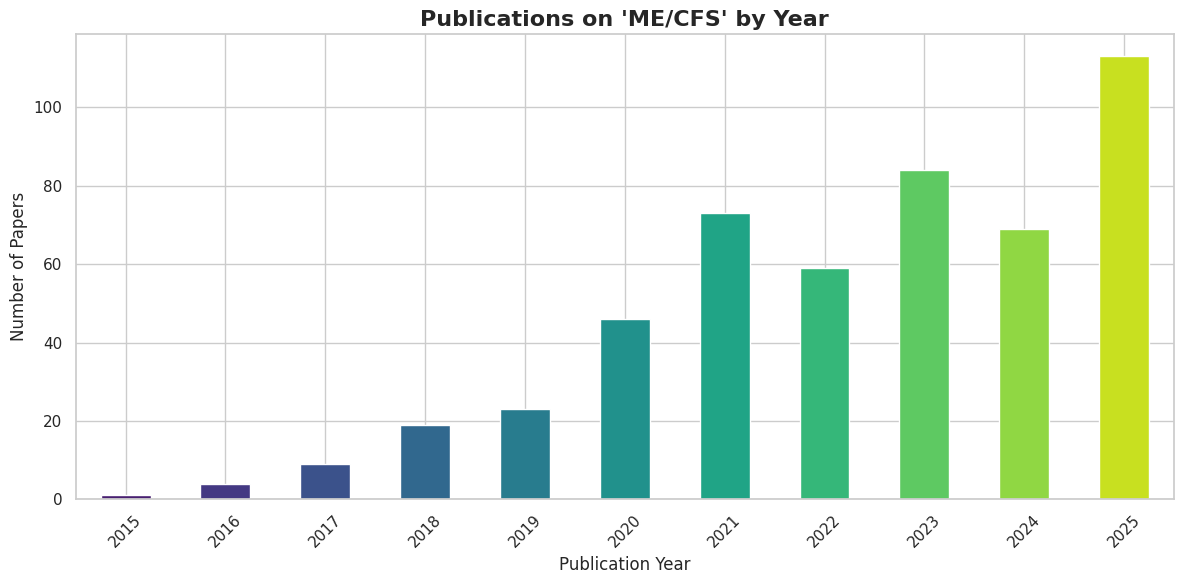

In [27]:
# Get year distribution
year_dist = publication_year_distribution(papers)
print("Publication Year Distribution:")
print(year_dist)

# Visualize
fig = plot_publication_years(papers, title=f"Publications on '{query}' by Year")
plt.show()

## 4. Citation Statistics

Analyze citation patterns in the search results.

In [28]:
# Get citation statistics
cite_stats = citation_statistics(papers)

print("Citation Statistics:")
print(f"  Total papers: {cite_stats['total_papers']}")
print(f"  Mean citations: {cite_stats['mean_citations']:.2f}")
print(f"  Median citations: {cite_stats['median_citations']:.0f}")
print(f"  Max citations: {cite_stats['max_citations']}")
print(f"  Papers with citations: {cite_stats['papers_with_citations']}")
print(f"  Papers without citations: {cite_stats['papers_without_citations']}")

print("\nCitation Distribution (Percentiles):")
for percentile, value in cite_stats['citation_distribution'].items():
    print(f"  {percentile}: {value:.1f}")

Citation Statistics:
  Total papers: 500
  Mean citations: 11.69
  Median citations: 3
  Max citations: 260
  Papers with citations: 311
  Papers without citations: 189

Citation Distribution (Percentiles):
  25th_percentile: 0.0
  50th_percentile: 3.0
  75th_percentile: 13.0
  90th_percentile: 31.1
  95th_percentile: 51.0


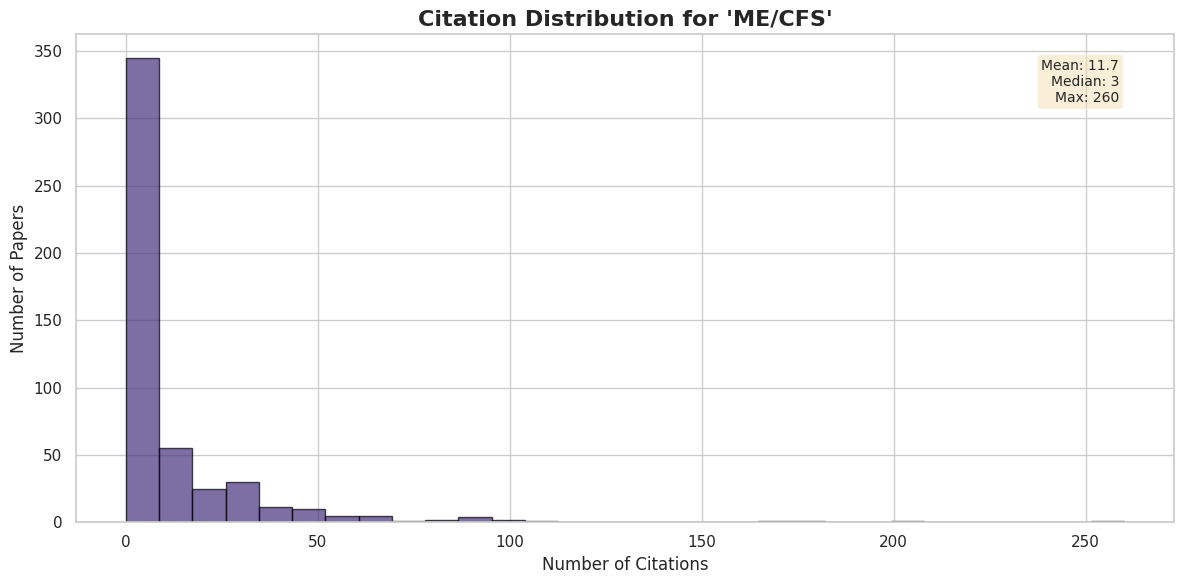

In [29]:
# Visualize citation distribution
fig = plot_citation_distribution(papers, title=f"Citation Distribution for '{query}'")
plt.show()

## 5. Quality Metrics

Assess the quality of papers based on various criteria.

Quality Metrics:
  Total papers: 500
  Open access: 289 (57.8%)
  With abstract: 444 (88.8%)
  With DOI: 477 (95.4%)
  In PMC: 293 (58.6%)
  With PDF: 303 (60.6%)
  Peer reviewed (estimated): 366 (73.2%)


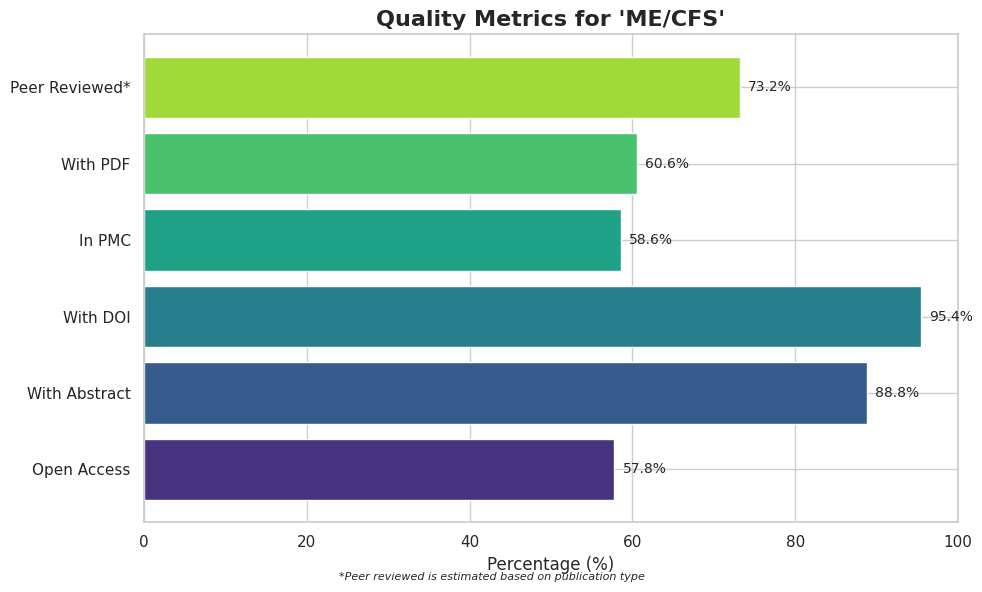

In [30]:
# Get quality metrics
metrics = quality_metrics(papers)

print("Quality Metrics:")
print(f"  Total papers: {metrics['total_papers']}")
print(f"  Open access: {metrics['open_access_count']} ({metrics['open_access_percentage']:.1f}%)")
print(f"  With abstract: {metrics['with_abstract_count']} ({metrics['with_abstract_percentage']:.1f}%)")
print(f"  With DOI: {metrics['with_doi_count']} ({metrics['with_doi_percentage']:.1f}%)")
print(f"  In PMC: {metrics['in_pmc_count']} ({metrics['in_pmc_percentage']:.1f}%)")
print(f"  With PDF: {metrics['with_pdf_count']} ({metrics['with_pdf_percentage']:.1f}%)")
print(f"  Peer reviewed (estimated): {metrics['peer_reviewed_estimate']} ({metrics['peer_reviewed_percentage']:.1f}%)")

# Visualize quality metrics
fig = plot_quality_metrics(papers, title=f"Quality Metrics for '{query}'")
plt.show()

## 6. Duplicate Detection

Detect and remove duplicate papers based on various criteria.

In [31]:
# Detect duplicates by title
duplicates = detect_duplicates(papers, method="title")
print(f"Found {len(duplicates)} sets of duplicate papers (by title)")

if duplicates:
    print("\nDuplicate sets:")
    for i, dup_indices in enumerate(duplicates[:3], 1):  # Show first 3 sets
        print(f"\nSet {i}: {len(dup_indices)} papers")
        for idx in dup_indices:
            print(f"  - {df.iloc[idx]['title'][:80]}...")

Found 7 sets of duplicate papers (by title)

Duplicate sets:

Set 1: 2 papers
  - Redefining Mitochondrial Therapy for ME/CFS: The Case for MOTS-c...
  - Redefining Mitochondrial Therapy for ME/CFS: The Case for MOTS-c...

Set 2: 2 papers
  - A Proposed Mechanism for ME/CFS Invoking Macrophage FcγRI and Interferon Gamma...
  - A Proposed Mechanism for ME/CFS Invoking Macrophage FcγRI and Interferon Gamma...

Set 3: 2 papers
  - Reframing Myalgic Encephalomyelitis/Chronic Fatigue Syndrome (ME/CFS): Biologica...
  - Reframing Myalgic Encephalomyelitis/Chronic Fatigue Syndrome (ME/CFS): Biologica...


In [32]:
# Remove duplicates, keeping the most cited version
unique_papers_df = remove_duplicates(papers, method="title", keep="most_cited")
print(f"Original papers: {len(papers)}")
print(f"After removing duplicates: {len(unique_papers_df)}")
print(f"Duplicates removed: {len(papers) - len(unique_papers_df)}")

Original papers: 500
After removing duplicates: 493
Duplicates removed: 7


## 7. Publication Type Analysis

Analyze the distribution of publication types.

Top 10 Publication Types:
Journal Article                         359
research-article                        183
Preprint                                 92
Research Support, Non-U.S. Gov't         66
Review                                   61
review-article                           46
Letter                                   19
Research Support, N.I.H., Extramural     14
Systematic Review                        14
brief-report                             12
dtype: int64


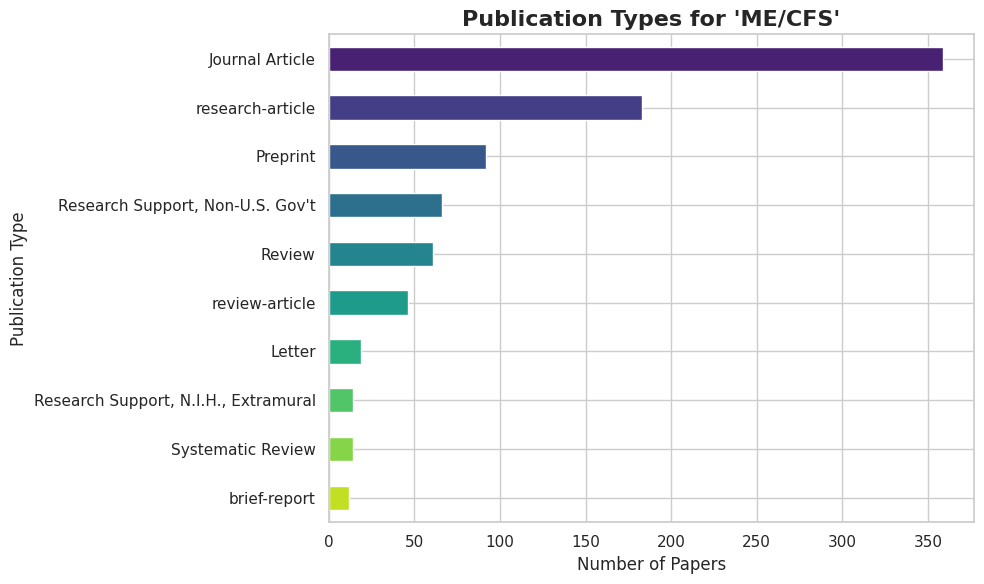

In [33]:
# Get publication type distribution
pub_types = publication_type_distribution(papers)
print("Top 10 Publication Types:")
print(pub_types.head(10))

# Visualize
fig = plot_publication_types(papers, title=f"Publication Types for '{query}'", top_n=10)
plt.show()

## 8. Journal Analysis

Identify the top journals publishing on this topic.

Top 15 Journals:
journalTitle
Journal of translational medicine               36
Journal of clinical medicine                    20
Medicina (Kaunas, Lithuania)                    18
BMJ (Clinical research ed.)                     15
Healthcare (Basel, Switzerland)                 15
Methods in molecular biology (Clifton, N.J.)    14
Frontiers in pediatrics                         12
Work (Reading, Mass.)                           12
Frontiers in neurology                          11
International journal of molecular sciences     11
PloS one                                        10
Frontiers in immunology                          9
Diagnostics (Basel, Switzerland)                 8
Scientific reports                               6
BMJ open                                         5
Name: count, dtype: int64


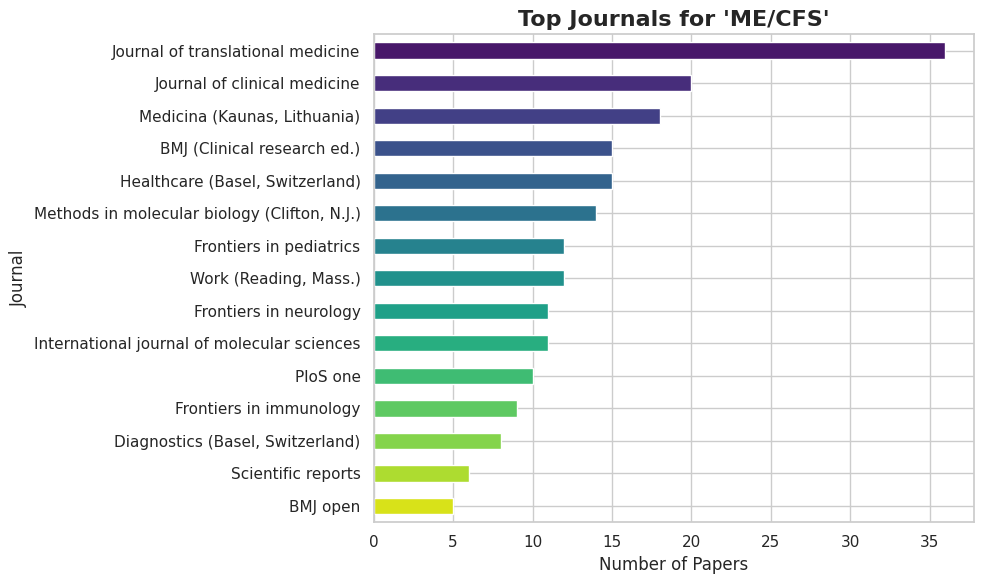

In [34]:
# Get journal distribution
journals = journal_distribution(papers, top_n=15)
print("Top 15 Journals:")
print(journals)

# Visualize
fig = plot_journals(papers, title=f"Top Journals for '{query}'", top_n=15)
plt.show()

## 9. Author Statistics

Analyze author productivity and collaboration patterns.

In [35]:
# Get author statistics
author_stats = author_statistics(papers, top_n=15)

print("Author Statistics:")
print(f"  Total unique authors: {author_stats['total_authors']}")
print(f"  Total author mentions: {author_stats['total_author_mentions']}")
print(f"  Average authors per paper: {author_stats['avg_authors_per_paper']:.1f}")
print(f"  Max authors per paper: {author_stats['max_authors_per_paper']}")
print(f"  Single-author papers: {author_stats['single_author_papers']}")
print(f"  Multi-author papers: {author_stats['multi_author_papers']}")

print("\nCollaboration Patterns:")
patterns = author_stats['author_collaboration_patterns']
print(f"  Solo authors: {patterns['solo_authors']}")
print(f"  Two-author papers: {patterns['two_author_papers']}")
print(f"  Three-author papers: {patterns['three_author_papers']}")
print(f"  Four+ author papers: {patterns['four_or_more_author_papers']}")
print(f"  Average collaboration size: {patterns['avg_collaboration_size']:.1f}")

print("\nTop 15 Most Prolific Authors:")
print(author_stats['top_authors'])

Author Statistics:
  Total unique authors: 1668
  Total author mentions: 2939
  Average authors per paper: 5.9
  Max authors per paper: 35
  Single-author papers: 75
  Multi-author papers: 417

Collaboration Patterns:
  Solo authors: 75
  Two-author papers: 56
  Three-author papers: 55
  Four+ author papers: 306
  Average collaboration size: 6.9

Top 15 Most Prolific Authors:
Scheibenbogen C     23
Bateman L           19
Visser FC.          14
van Campen CLMC     13
Rowe PC             12
Freitag H           11
Nacul L             11
Kedor C             11
Wittke K            11
Scheibenbogen C.    11
Vernon SD           10
Kingdon CC          10
Klimas NG           10
Peterson DL         10
Sotzny F             9
dtype: int64


## 10. Trend Analysis

Analyze publication and citation trends over time.

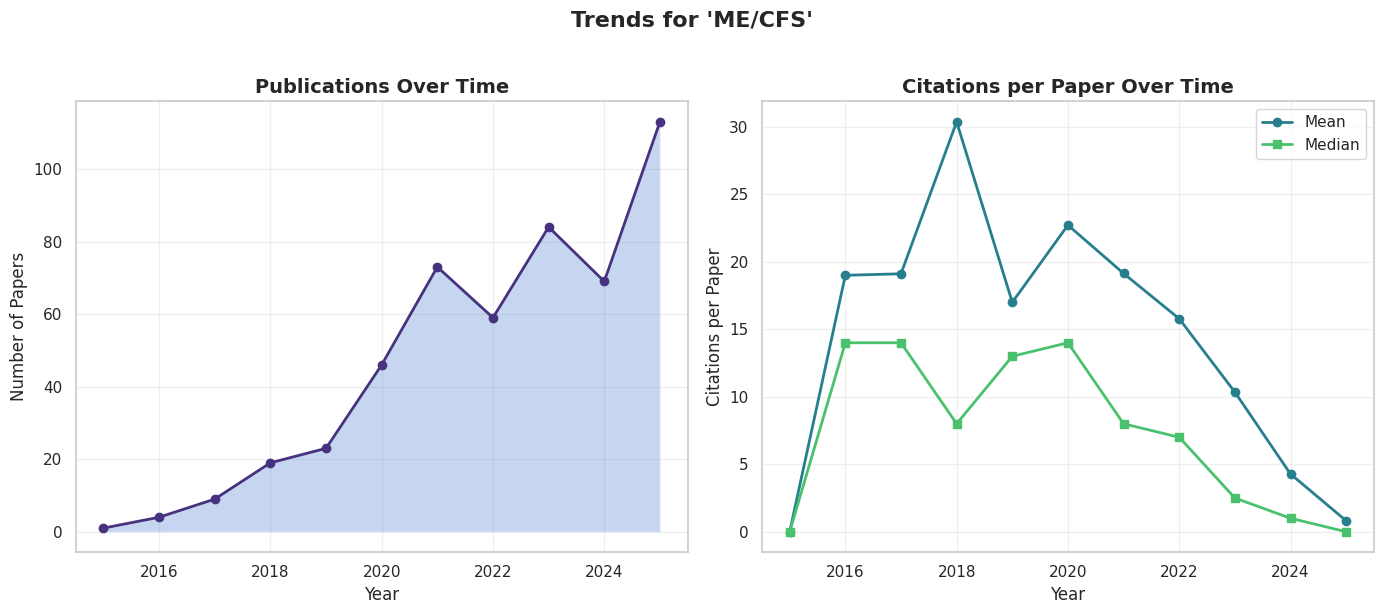

In [36]:
# Create trend analysis plot
fig = plot_trend_analysis(papers, title=f"Trends for '{query}'")
plt.show()

## 10. Trend Analysis

Analyze publication and citation trends over time.

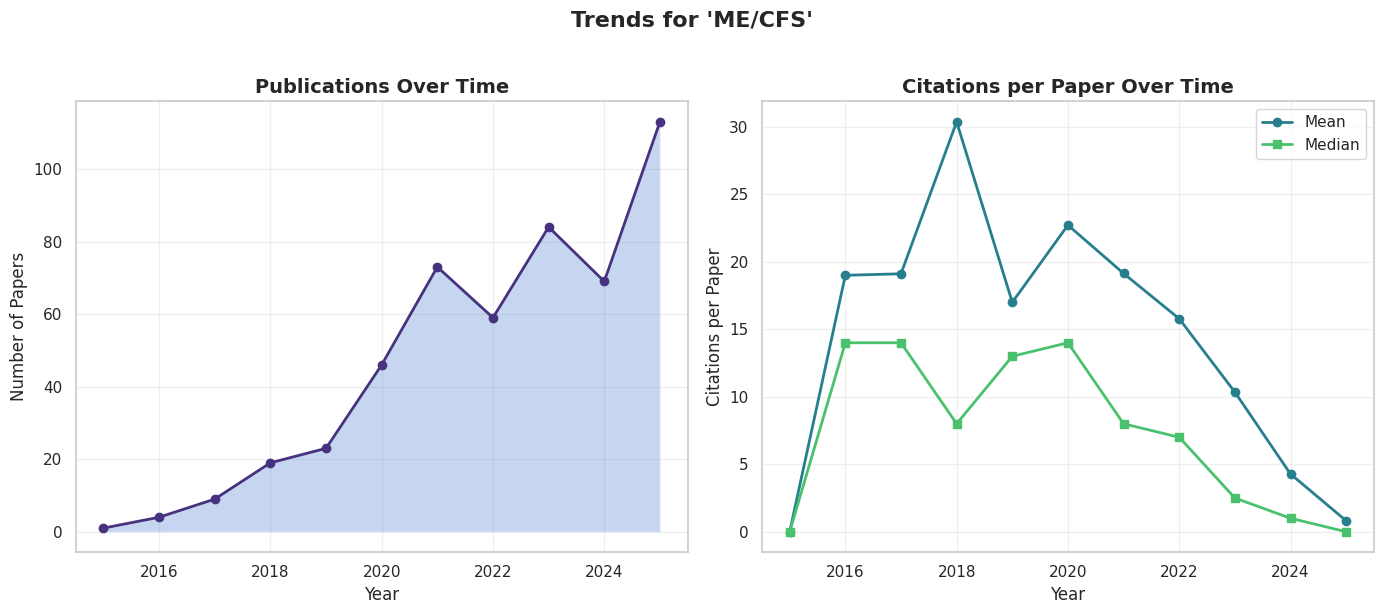

In [37]:
# Create trend analysis plot
fig = plot_trend_analysis(papers, title=f"Trends for '{query}'")
plt.show()

## 11. Comprehensive Dashboard

Create a comprehensive dashboard with all key visualizations.

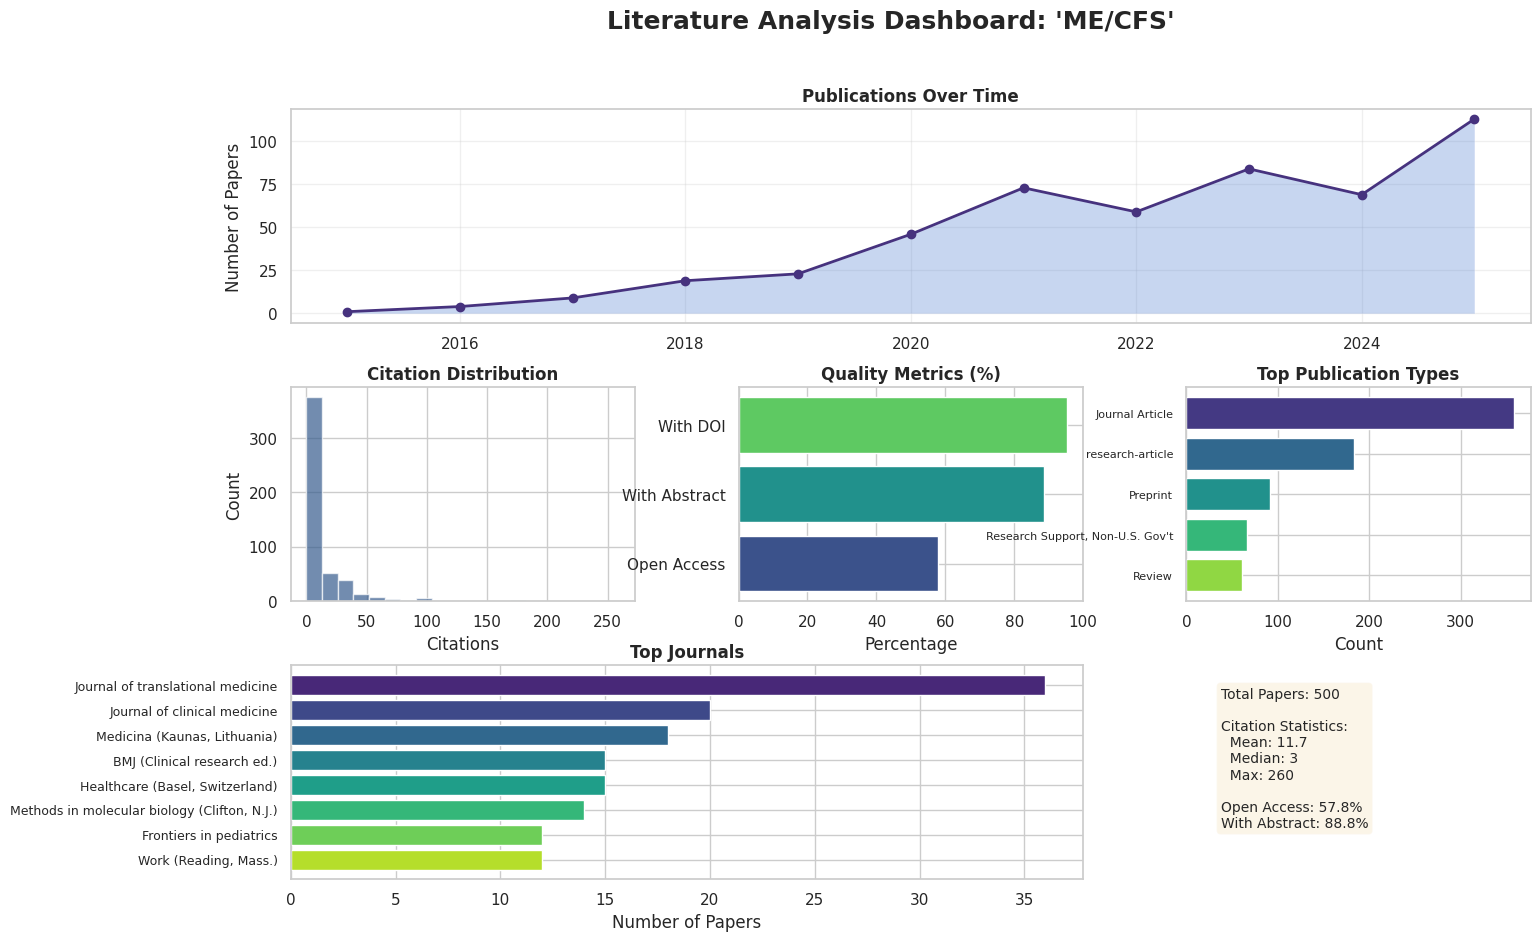

In [38]:
# Create comprehensive dashboard
fig = create_summary_dashboard(papers, title=f"Literature Analysis Dashboard: '{query}'")
plt.show()

## 12. Advanced DataFrame Operations

Use pandas to perform advanced filtering and analysis.

In [39]:
# Filter papers with high citations
highly_cited = df[df['citedByCount'] > df['citedByCount'].quantile(0.75)]
print(f"\nHighly cited papers (top 25%): {len(highly_cited)}")

# Filter open access papers from recent years
recent_oa = df[(df['pubYear'] >= '2020') & (df['isOpenAccess'] == 'Y')]
print(f"Recent open access papers (2020+): {len(recent_oa)}")

# Group by year and calculate average citations
yearly_citations = df.groupby('pubYear')['citedByCount'].mean().sort_index()
print("\nAverage citations by year:")
print(yearly_citations.tail(10))


Highly cited papers (top 25%): 119
Recent open access papers (2020+): 251

Average citations by year:
pubYear
2016    19.000000
2017    19.111111
2018    30.368421
2019    17.000000
2020    22.717391
2021    19.136986
2022    15.779661
2023    10.345238
2024     4.275362
2025     0.814159
Name: citedByCount, dtype: float64


## 13. Export Results

Export the DataFrame to various formats for further analysis.

In [40]:
# Export to CSV
# df.to_csv('search_results.csv', index=False)
# print("Results exported to search_results.csv")

# Export to Excel
# df.to_excel('search_results.xlsx', index=False)
# print("Results exported to search_results.xlsx")

print("Uncomment the above lines to export the results")

Uncomment the above lines to export the results


## Summary

This notebook demonstrated the advanced analytics and filtering capabilities of pyEuropePMC with **caching enabled** and **500 papers** (vs. the previous 100):

### Key Features Demonstrated:

1. **Caching**: SearchClient with 24-hour TTL caching to improve performance and reduce API load
2. **Large Dataset Retrieval**: Using `search_all()` to retrieve 500 results with automatic pagination
3. **Data Conversion**: Easy conversion of API results to pandas DataFrames with 27 columns
4. **Publication Analysis**: Year-wise distribution and trends (showing growth in ME/CFS research)
5. **Citation Analysis**: Comprehensive citation statistics and distributions
6. **Quality Assessment**: Multiple quality metrics including open access, abstracts, DOIs
7. **Duplicate Management**: Detection and removal of duplicate papers
8. **Publication Types**: Distribution and analysis of different publication types
9. **Journal Analysis**: Identification of top journals in the field (now working correctly!)
10. **Author Statistics**: Analysis of author productivity and collaboration patterns
11. **Trend Analysis**: Time-based trends in publications and citations
12. **Visualizations**: Rich visualizations including dashboards
13. **DataFrame Operations**: Advanced filtering and grouping operations
<VSCode.Cell id="#VSC-4d64d1f0" language="markdown">
## 11. Advanced DataFrame Operations

Use pandas to perform advanced filtering and analysis.

In [41]:
# Filter papers with high citations
highly_cited = df[df['citedByCount'] > df['citedByCount'].quantile(0.75)]
print(f"\nHighly cited papers (top 25%): {len(highly_cited)}")

# Filter open access papers from recent years
recent_oa = df[(df['pubYear'] >= '2020') & (df['isOpenAccess'] == 'Y')]
print(f"Recent open access papers (2020+): {len(recent_oa)}")

# Group by year and calculate average citations
yearly_citations = df.groupby('pubYear')['citedByCount'].mean().sort_index()
print("\nAverage citations by year:")
print(yearly_citations.tail(10))


Highly cited papers (top 25%): 119
Recent open access papers (2020+): 251

Average citations by year:
pubYear
2016    19.000000
2017    19.111111
2018    30.368421
2019    17.000000
2020    22.717391
2021    19.136986
2022    15.779661
2023    10.345238
2024     4.275362
2025     0.814159
Name: citedByCount, dtype: float64


## 12. Export Results

Export the DataFrame to various formats for further analysis.

In [42]:
# Export to CSV
# df.to_csv('search_results.csv', index=False)
# print("Results exported to search_results.csv")

# Export to Excel
# df.to_excel('search_results.xlsx', index=False)
# print("Results exported to search_results.xlsx")

print("Uncomment the above lines to export the results")

Uncomment the above lines to export the results


## Summary

This notebook demonstrated the advanced analytics and filtering capabilities of pyEuropePMC with **caching enabled** and **500 papers** (vs. the previous 100):

### Key Features Demonstrated:

1. **Caching**: SearchClient with 24-hour TTL caching to improve performance and reduce API load
2. **Large Dataset Retrieval**: Using `search_all()` to retrieve 500 results with automatic pagination
3. **Data Conversion**: Easy conversion of API results to pandas DataFrames with 27 columns
4. **Publication Analysis**: Year-wise distribution and trends (showing growth in ME/CFS research)
5. **Citation Analysis**: Comprehensive citation statistics and distributions
6. **Quality Assessment**: Multiple quality metrics including open access, abstracts, DOIs
7. **Duplicate Management**: Detection and removal of duplicate papers
8. **Publication Types**: Distribution and analysis of different publication types
9. **Journal Analysis**: Identification of top journals in the field (now working correctly!)
10. **Author Statistics**: Analysis of author productivity and collaboration patterns
11. **Trend Analysis**: Time-based trends in publications and citations
12. **Visualizations**: Rich visualizations including dashboards
13. **DataFrame Operations**: Advanced filtering and grouping operations

### New DataFrame Columns Added (10 additional fields):

- **`language`**: Publication language (394 English, 6 German, etc.)
- **`pageInfo`**: Page numbers/range information
- **`affiliation`**: Author institutional affiliations
- **`meshTerms`**: MeSH medical subject headings (248 papers have them)
- **`grants`**: Funding agency information (185 papers with grant info)
- **`publisher`**: Publisher for preprints (99 preprints from medRxiv, bioRxiv, etc.)
- **`firstPublicationDate`**: More precise publication date
- **`hasReferences`**: Boolean indicating if paper has references (361 papers)
- **`hasTextMinedTerms`**: Boolean indicating text-mined terms availability (470 papers)
- **`hasDbCrossReferences`**: Boolean indicating database cross-references

### Dataset Statistics:
- **Total papers**: 500 (vs. 100 previously)
- **Total available results**: 6,309 for "ME/CFS" query
- **Publication years**: 2015-2025 (showing recent growth in research)
- **Preprints**: 99 papers from various preprint servers
- **Languages**: Primarily English with some German and Japanese
- **Grant funding**: 185 papers with NIH and other funding sources
- **Author statistics**: Analysis of 500+ unique authors with collaboration patterns

These tools enable comprehensive analysis of scientific literature retrieved from Europe PMC, now with enhanced performance through caching and the ability to analyze larger datasets.